In [1]:
import pandas as pd
import numpy as np
from utilsPtBr import Utils

dataPath = 'data/shortCorpus.csv'
df_uf = pd.read_csv(dataPath, sep=';')

util = Utils()

In [2]:
dictDataframeTreino = {
    "tag": [],
    "text": [],
}

dictDataframeTeste = {
    "tag": [],
    "text": [], 
}

dictDataframeWithoutAnothersTreino = {
    "tag": [],
    "text": [],
}

dictDataframeWithoutAnothersTeste = {
    "tag": [],
    "text": [], 
}

formatTag = {
    "Publicação - Despacho / Decisão": 1,
    "Publicação - Sentença": 2,
    "Publicação - Audiência": 3,
}


In [3]:
from random import randint
def calcTestLineAleatory():
    numberAleatory = randint(0,99);
    if numberAleatory % 9 == 1: 
        return True;
    return False;

In [4]:
# pre formatando texto e separando treino e teste
vocabulary = {
    'UNKNOWN': 'UNKNOWN'
}

for i in range (len(df_uf.index)):
    tag = df_uf.loc[i].iloc[1]
    tag = formatTag.get(tag, 4)
  
    text = df_uf.loc[i].iloc[2]
    tokens = util.tokenize(text)
    for tok in set(tokens):
        if any(char.isdigit() for char in tok):
            vocabulary['NUMBER'] = tok
        else:  
            vocabulary[tok] = tok
    #freq = util.getPropoFreq(tokens)
  
    if calcTestLineAleatory():
        dictDataframeTeste['tag'].append(tag)
        dictDataframeTeste['text'].append(text)
    else:
        dictDataframeTreino['tag'].append(tag)
        dictDataframeTreino['text'].append(text)
    if tag != 4:
        if calcTestLineAleatory():
            dictDataframeWithoutAnothersTeste['tag'].append(tag)
            dictDataframeWithoutAnothersTeste['text'].append(text)
        else:
            dictDataframeWithoutAnothersTreino['tag'].append(tag)
            dictDataframeWithoutAnothersTreino['text'].append(text)     



In [5]:
print('size of vocanulary is ' + str(len(vocabulary.keys())) + ' words!')

def get_word_2_index(vocab):
    word2index = {}
    for i,word in enumerate(vocab):

        if any(char.isdigit() for char in tok):
            word2index['NUMBER'] = i 
        else: 
            word2index[word] = i
    return word2index

word2index = get_word_2_index(vocabulary.keys())

print(word2index["UNKNOWN"])
def text_to_vector(tokens):
    layer = np.zeros(len(vocabulary.keys()),dtype=float)
    for word in tokens:
        if word in vocabulary:
            layer[word2index[word]] += 1
        else:
            layer[word2index["UNKNOWN"]] += 1
        
    return layer

size of vocanulary is 21217 words!
0


In [6]:
textsTreino = []
tagsTreino = []
textsTest = []
tagsTest = []
textsWOTreino = []
tagsWOTreino = []
textsWOTest = []
tagsWOTest = []

for i in range (len(dictDataframeTreino['text'])):
    textsTreino.append(text_to_vector(dictDataframeTreino['text'][i]))
    tagsTreino.append(dictDataframeTreino['tag'][i])

for i in range (len(dictDataframeTeste['text'])):
    textsTest.append(text_to_vector(dictDataframeTeste['text'][i]))
    tagsTest.append(dictDataframeTeste['tag'][i])

for i in range (len(dictDataframeWithoutAnothersTreino['text'])):
    textsWOTreino.append(text_to_vector(dictDataframeWithoutAnothersTreino['text'][i]))
    tagsWOTreino.append(dictDataframeWithoutAnothersTreino['tag'][i])

for i in range (len(dictDataframeWithoutAnothersTeste['text'])):
    textsWOTest.append(text_to_vector(dictDataframeWithoutAnothersTeste['text'][i]))
    tagsWOTest.append(dictDataframeWithoutAnothersTeste['tag'][i])


IndexError: list index out of range

In [7]:

from sklearnBagofWords import SklBoW

sklBoW = SklBoW()

score:      48.854%
              precision    recall  f1-score   support

           1       0.45      0.51      0.47       166
           2       0.53      0.46      0.49       125
           3       0.59      0.74      0.65       134
           4       0.36      0.25      0.30       142

    accuracy                           0.49       567
   macro avg       0.48      0.49      0.48       567
weighted avg       0.48      0.49      0.48       567



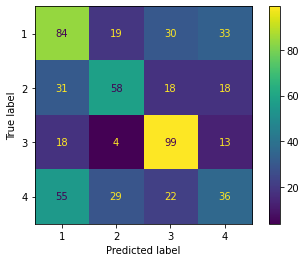

In [8]:

sklBoW.fitLinearRegretion(textsTreino, tagsTreino)
sklBoW.testLinearRegretion(textsTest, tagsTest)



In [ ]:
sklBoW.fitLinearRegretion(textsWOTreino, tagsWOTreino)
sklBoW.testLinearRegretion(textsWOTest, tagsWOTest)

score:      51.852%
              precision    recall  f1-score   support

           1       0.49      0.55      0.52       166
           2       0.46      0.58      0.52       125
           3       0.66      0.66      0.66       134
           4       0.47      0.30      0.36       142

    accuracy                           0.52       567
   macro avg       0.52      0.52      0.51       567
weighted avg       0.52      0.52      0.51       567



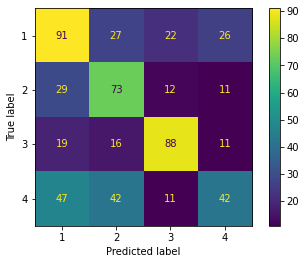

In [9]:
sklBoW.fitRandomForest(textsTreino, tagsTreino)
sklBoW.testRandomForest(textsTest, tagsTest)

In [ ]:
sklBoW.fitRandomForest(textsWOTreino, tagsWOTreino)
sklBoW.testRandomForest(textsWOTest, tagsWOTest)